# Classifying digits: the first example

The data in this example consists of 28 x 28 black and white images of handwritten digits; the dataset is directly available with Keras. The first code cell below downloads the contents into four separate NumPy tensors: image data and labels for both train and test sets.

In [23]:
import tensorflow as tf

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

The next code cell shows the shape and rank of each of the four tensors. For example, `train_images` is a tensor of rank 3 having containing the data of 60000 training images, each being represented by 28 x 28 pixel values (integer values ranging from 0 to 255). The tensor `train_labels` contains the true labels (integer values between 0 and 9) for each training sample. 

The test set contains an additional 10000 images (data and labels) for testing the model.

In [24]:
print('Train_data: tensor of shape',train_images.shape,'and rank',train_images.ndim)
print('Train_labels: tensor of shape',train_labels.shape,'and rank',train_labels.ndim)
print('Test_data: tensor of shape',test_images.shape,'and rank',test_images.ndim)
print('Test_labels: tensor of shape',test_labels.shape,'and rank',test_labels.ndim)

Train_data: tensor of shape (60000, 28, 28) and rank 3
Train_labels: tensor of shape (60000,) and rank 1
Test_data: tensor of shape (10000, 28, 28) and rank 3
Test_labels: tensor of shape (10000,) and rank 1


To see what the data looks like, the following code cell shows how to use the Matplotlib library to generate a plot of one of the training samples.

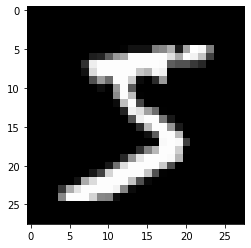

True label = 5


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

sample_number = 0
image = train_images[sample_number]
plt.imshow(image, cmap='gray')
plt.show()

print('True label =',train_labels[sample_number])

In the following, the data is subjected to some simple preprocessing. First, each sample is converted from the original 2D form of 28 x 28 integers to an 1D form of 28 $\cdot$ 28 = 784 integers in a process called *flattening*. Finally, all the entries of the tensors are normalized by dividing by 255 for numerical convenience.

In [26]:
train_data = train_images.reshape((60000,28*28))
train_data = train_data.astype('float32')
train_data /= 255

test_data = test_images.reshape((10000,28*28))
test_data = test_data.astype('float32')
test_data /= 255

The labels need to be preprocessed as well. The routine `to_categorical` provided by Keras transfers the integer labels to the one-hot form of 1D arrays having 10 elements; the element corresponding to the label has the value 1, and all the remaining 9 elements have the value zero.

In [27]:
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

The form of the new labels are shown below: the label corresponding to the first training sample (index 0) is five.

In [28]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

The following code cell creates the actual model. This particular neural network consists of two hidden layers: the first has 256 and the second 128 neurons, both have ReLU activation functions. Note that the shape of the input samples needs to be specified for the first layer.

The third layer is the output layer, which consists of 10 numbers corresponding to the probability value for each digit in this multiclass classification problem. The `softmax` activation function ensures that these 10 numbers are all between 0 and 1 and their sum is 1.

In [29]:
from tensorflow.keras.layers import Dense

network = tf.keras.models.Sequential()
network.add(Dense(256, activation = 'relu',input_shape=(28*28,)))
network.add(Dense(128, activation = 'relu'))
network.add(Dense(10, activation = 'softmax'))

network.summary() 


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               200960    
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In the following compilation step the optimizer defining the details of the learning process is selected from a set of alternatives provided by Keras. The loss function is selected according to the problem type: categorical cross entropy is the appropriate choice for a classification problem with multiple classes. Finally, the metrics monitored during training are specified.

In [30]:
network.compile(optimizer = 'rmsprop',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

The actual training of the neural network happens next; during this process, the trainable parameters of the model are adjusted so that the loss value (quantifying the difference between the model predictions and the true digit labels) steadily decreases.

Here the training lasts for 10 epochs, which means that the entire training set of 60000 samples is processed ten times in batches containing 128 samples.

In [31]:
network.fit(train_data, train_labels, epochs = 10, batch_size = 128)

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.2609 - accuracy: 0.9231
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1000 - accuracy: 0.9697
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0673 - accuracy: 0.9789
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0484 - accuracy: 0.9853
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0371 - accuracy: 0.9884
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0285 - accuracy: 0.9910
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0232 - accuracy: 0.9924
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0184 - accuracy: 0.9942
Epoch 9/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0142 - accuracy: 0.9954
Epoch 10/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0127 - accuracy: 0.9960

Now the model is trained, and is ready for testing; note that the model has not been subjected to the test data at any stage, which is important. The test accuracy is still surprisingly high (not quite as high as the training accuracy), even though the model is extremely simple.

In [32]:
test_loss, test_acc = network.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0933 - accuracy: 0.9797
Test accuracy: 0.9797000288963318


Predictions for individual samples can be obtained with the `predict` method of the model. Note that the predictions (like the labels) for each sample are ten-element vectors; the actual prediction is the index with highest numerical value. This index can be found with the NumPy `argmax` function. 

In [33]:
import numpy as np

predictions = network.predict(test_data)

sample_number = 8
print(predictions[sample_number])
print('Prediction =',np.argmax(predictions[sample_number]))
print('True =',np.argmax(test_labels[sample_number]))

[4.4665163e-19 2.1885107e-21 1.8695286e-12 1.8943840e-18 8.1939948e-11
 9.8537767e-01 1.4622222e-02 6.2273207e-17 1.2506767e-07 2.0788031e-08]
Prediction = 5
True = 5


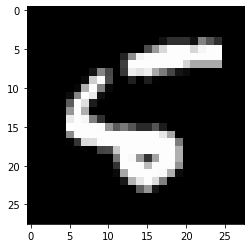

In [34]:
image = test_images[sample_number]
plt.imshow(image, cmap='gray')
plt.show()